In [1]:
import argparse
import os
import math
import random

import torch as th
import torch.distributed as dist
import torchvision as tv
import blobfile as bf
from PIL import Image
import warnings
import numpy as np
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
class Arguments(object):
    def __init__(self, dictionary):
        """Constructor"""
        for key in dictionary:
            setattr(self, key, dictionary[key])
            
def read_pil(path, d1=False):
    with bf.BlobFile(path, "rb") as f:
        pil_image = Image.open(f)
        pil_image.load()
        if d1:
            pil_image = pil_image.convert("L")
        else:
            pil_image = pil_image.convert("RGB")
    return pil_image

/home/as3ek/.conda/envs/hist/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
img = th.load("/scratch/as3ek/projects/spherical-diffusion/results/sample_3.pt")
img1 = th.load("/scratch/as3ek/projects/spherical-diffusion/results/sample_1.pt")
img2 = th.load("/scratch/as3ek/projects/spherical-diffusion/results/sample_2.pt")

In [16]:
img.size()

torch.Size([4, 7, 128, 128])

In [17]:
mask = th.round(img[0].cpu())

In [33]:
def show_mask(img, idx):
    mask = th.round(img[idx].cpu())
    
    # Get the number of channels
    num_channels = mask.shape[0]

    # Create a 1D index tensor for the channels
    channel_indices = th.arange(num_channels)

    # Multiply each channel of the image with the index
    result = mask * channel_indices.view(-1, 1, 1)
    
    mask = th.sum(result, dim=0)
    mask[mask > 6] = 0
    
    return color_class_map(mask)

In [19]:
# Get the number of channels
num_channels = mask.shape[0]

# Create a 1D index tensor for the channels
channel_indices = th.arange(num_channels)

# Multiply each channel of the image with the index
result = mask * channel_indices.view(-1, 1, 1)

In [20]:
mask = th.sum(result, dim=0)

In [21]:
mask[mask > 6] = 0

In [22]:
def color_class_map(class_map, class_id=0):
    cmap = np.array([[0,0,0],
                     [0, 0, 255], # Blue
                     [255, 0, 0], # Red
                     [255, 128, 0], # Orange
                     [255, 255, 0], # Yellow
                     [0, 255, 0], # Green 
                     [128, 0, 255]]) # Purple
    
    image = np.uint8(np.array(class_map))
    
    if class_id != 0:
        image[image != class_id] = 0
    
    return Image.fromarray(cmap[image].astype(np.uint8))

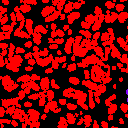

In [32]:
color_class_map(mask)

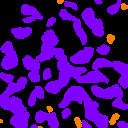

In [42]:
show_mask(img1, 0)

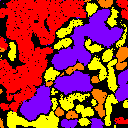

In [43]:
show_mask(img1, 1)

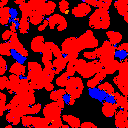

In [44]:
show_mask(img1, 2)

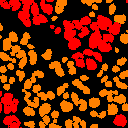

In [45]:
show_mask(img1, 3)

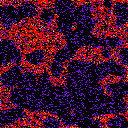

In [46]:
show_mask(img2, 0)

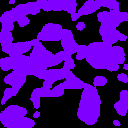

In [47]:
show_mask(img2, 1)

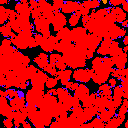

In [48]:
show_mask(img2, 2)

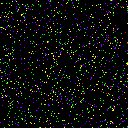

In [49]:
show_mask(img2, 3)

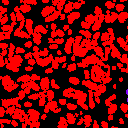

In [50]:
show_mask(img, 0)

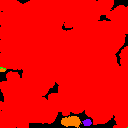

In [51]:
show_mask(img, 1)

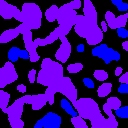

In [52]:
show_mask(img, 2)

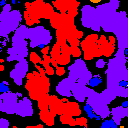

In [53]:
show_mask(img, 3)